# Model for Analysing loan_approval  
## Problem Statement ->
- Problem -> A customer having the information( given in data ) is risky for approving Loan or Not ?
- I have loan approval dataset.I am interested in knowing the relationship btw the output column "Risk_Flag" & the input columns.
- As output coln has only two possibilities 0 & 1 ,hence it is Classification Problem so I'm willing to know the relationship is linear or not.
- For it I'm going to train a Classification Algorithm -> Logostic Regression. it involes these steps:

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Converting into dataframe
df=pd.read_json("loan_approval_dataset.json")

In [3]:
#Checking the first 5 rows of the dataframe
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [5]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [6]:
df.shape

(252000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [8]:
df.isnull().sum() # No null vals

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [9]:
df.drop(columns=['Id'],inplace=True) # useless 'ID' col

In [10]:
df.describe() # some statistical Measurement

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
df.nunique() # Unique vals in the given columns

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
CITY                   317
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

In [12]:
df.corr(numeric_only=True) # correlation btw the numeric columns 

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


## Exploratory Data Analysis

In [13]:
# numerical_columns 
n = df.select_dtypes(include=['int64','float64']).columns
# categorical_columns
c = df.select_dtypes(include=['object']).columns
print(n)
print(c)

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')
Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')


### 1. Plots for Numeric cols

C:\Users\web\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\web\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\web\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\web\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

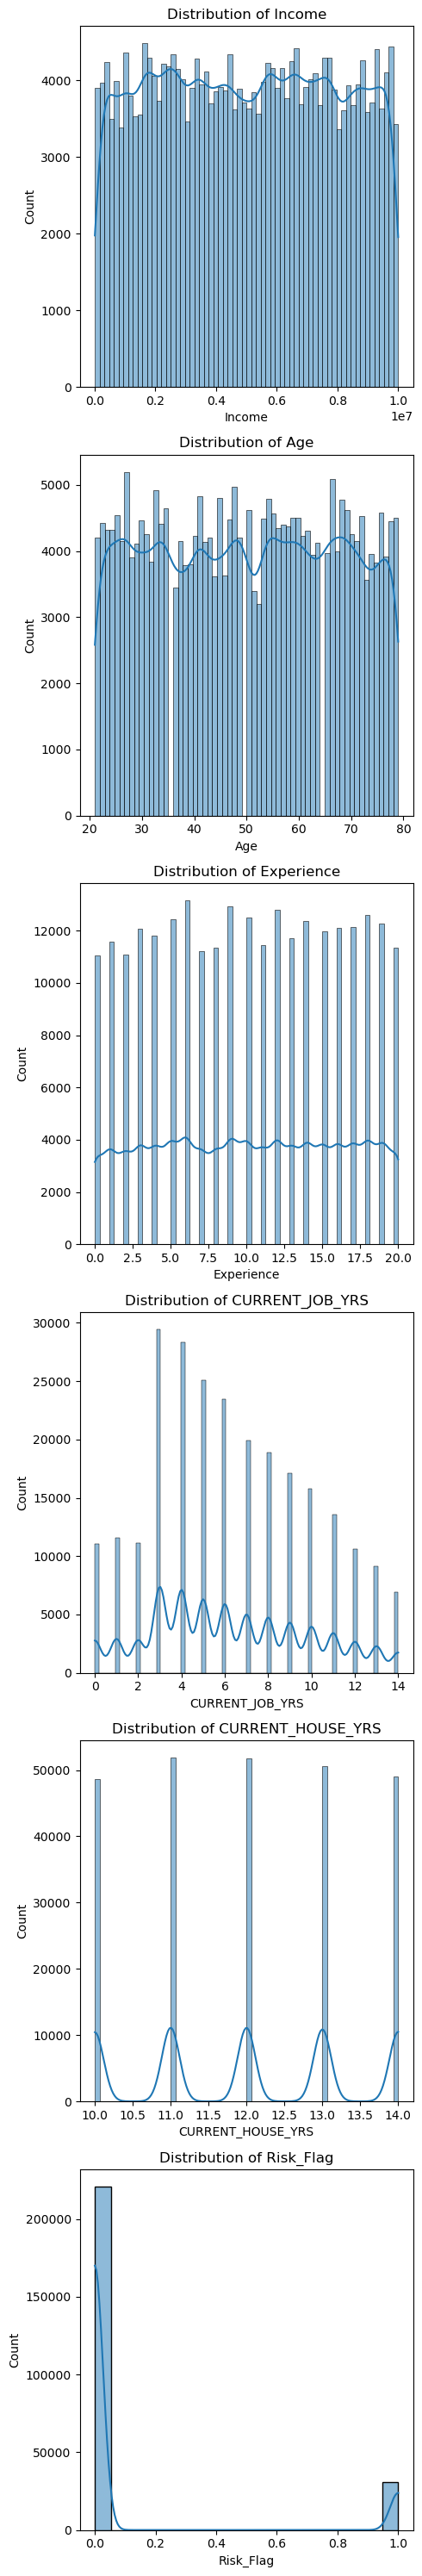

In [14]:
# Distribution plot for Numeric cols

fig, axs = plt.subplots(len(n), figsize=(5, 5*len(n)))

for i, col in enumerate(n):
    sns.histplot(df[col], ax=axs[i],kde=True)
    axs[i].set_title('Distribution of ' + col)

plt.tight_layout()
plt.show()

#### Distribution plots giving fol^g inf^n :
- this data is symmetrically distributed over Age,Experience,Income 
- This is unbalanced classification problem as Target col -> "Risk_Flag" is unbalanced


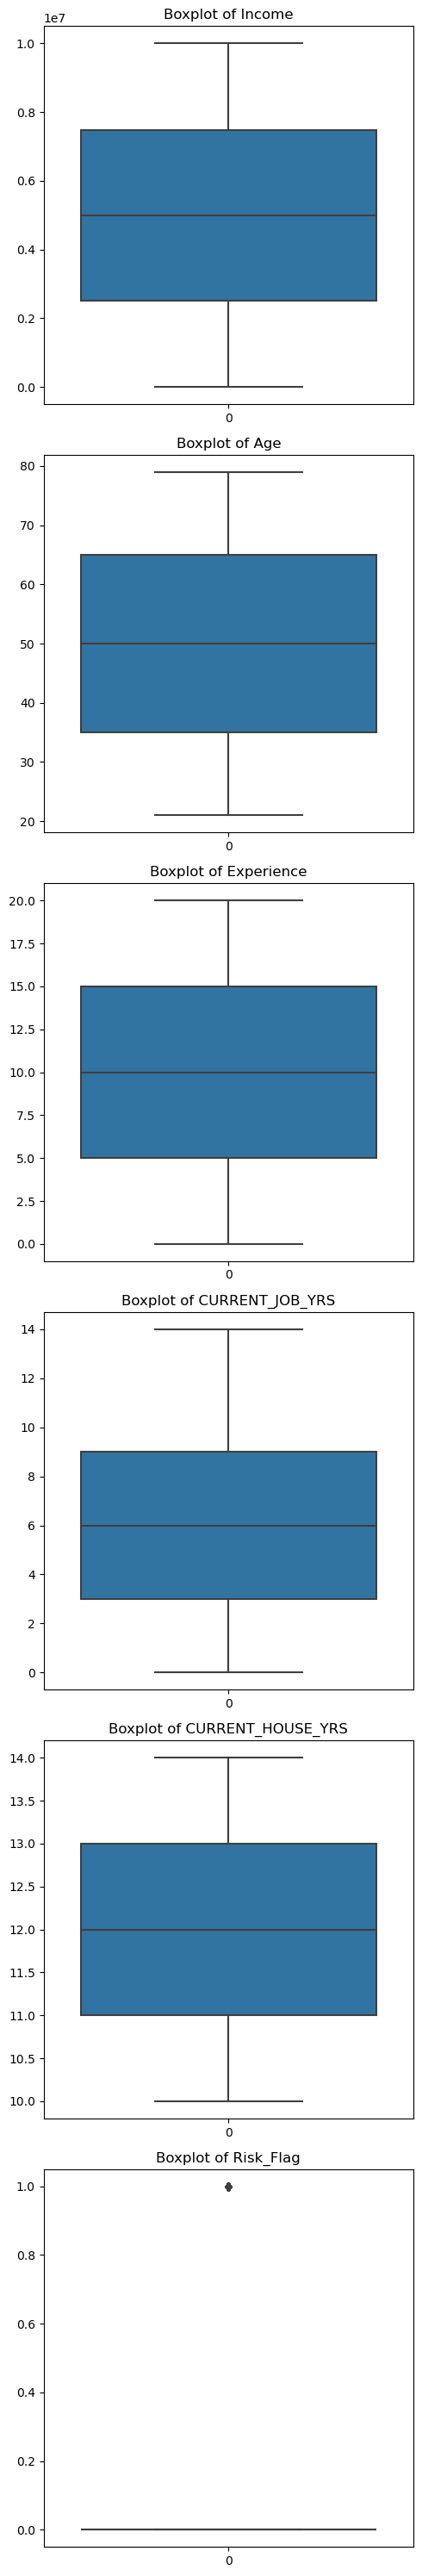

In [15]:
# Boxplot for Numeric cols

fig, axs = plt.subplots(len(n), figsize=(5, 5*len(n)))

for i, col in enumerate(n):
    sns.boxplot(df[col], ax=axs[i])
    axs[i].set_title('Boxplot of ' + col)

plt.tight_layout()
plt.show()

#### No outliers in Numeric columns 

### 2. Plots for Categorical columns

In [16]:
c

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [17]:
for i in c:
    print(df[i].value_counts())
    print("__"*20)


Married/Single
single     226272
married     25728
Name: count, dtype: int64
________________________________________
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64
________________________________________
Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64
________________________________________
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendan

<Axes: xlabel='Married/Single'>

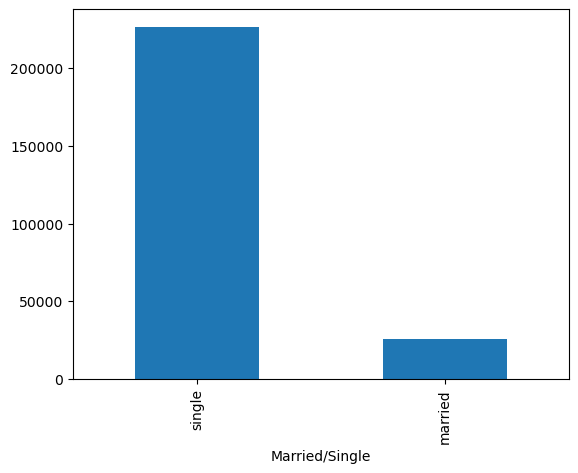

In [18]:
df["Married/Single"].value_counts().plot(kind='bar')


<Axes: xlabel='House_Ownership'>

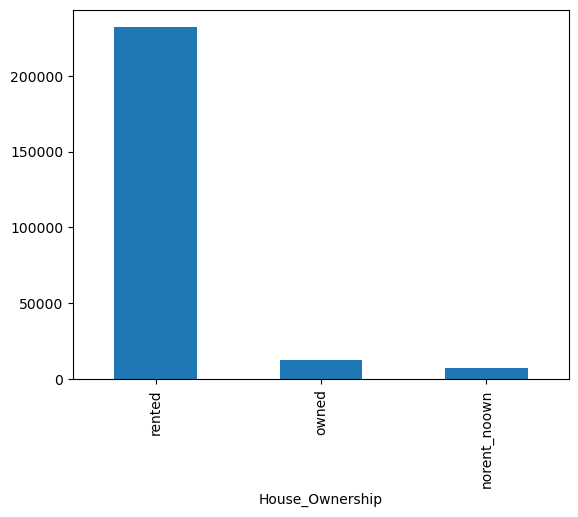

In [19]:
df["House_Ownership"].value_counts().plot(kind='bar')

<Axes: xlabel='STATE'>

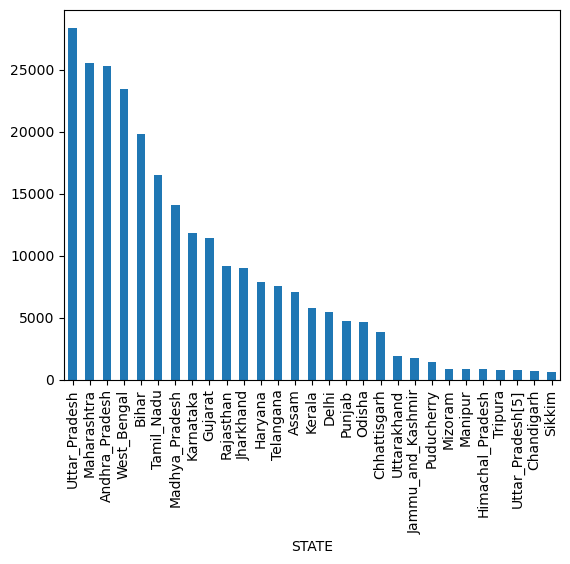

In [20]:
df["STATE"].value_counts().plot(kind='bar')


##### HeatMap for Correlation 

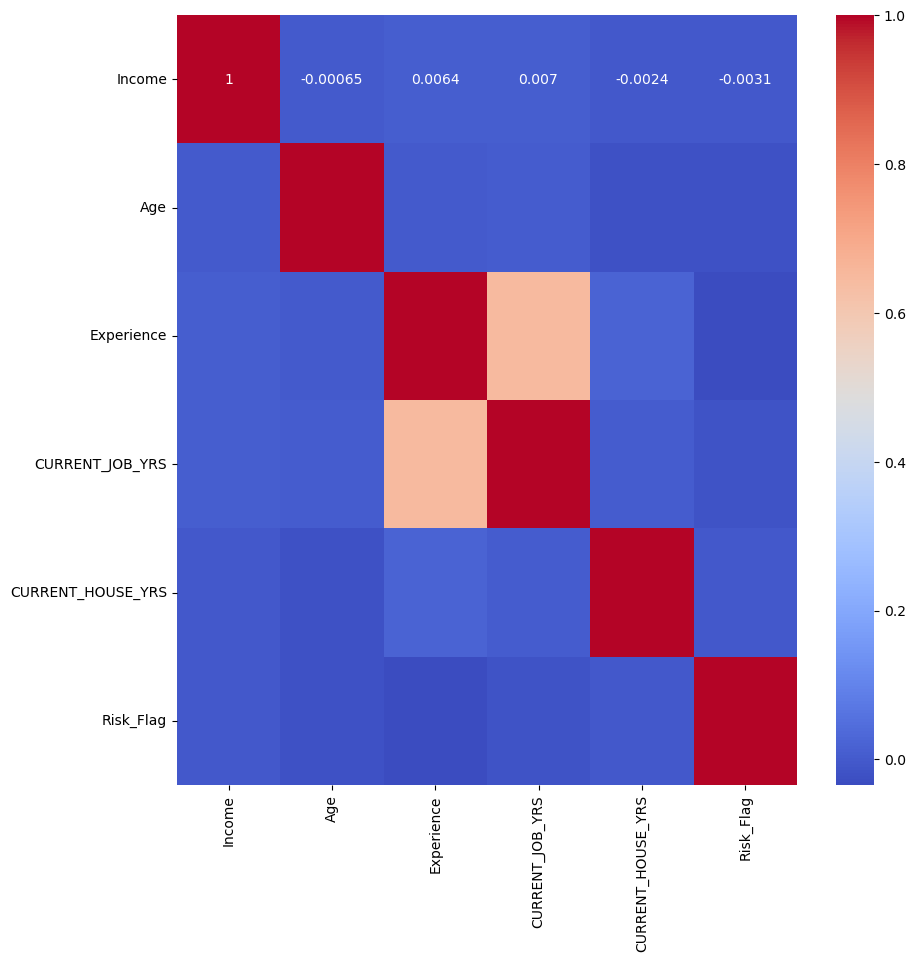

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

## SCALING

In [22]:
X = df.drop(columns=["Risk_Flag"])
y = df['Risk_Flag']


In [23]:
numeric = X.select_dtypes("int","float").columns
numeric

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()


In [25]:
X[numeric] = st.fit_transform(X[numeric])

In [26]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,married,rented,no,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,-0.914131,1.431135


In [27]:
Xe = pd.get_dummies(X,drop_first=True,dtype=int)


In [28]:
Xe.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.895457,-0.583344,-0.014067,0.731036,0.716356,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.268128,-0.173119,0.152528,-0.914131,1.431135,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [30]:
pd.Series(y).value_counts()

0    221004
1     30996
Name: count, dtype: int64

### Training the logistic Regression

In [31]:
#Splitting the data into X and y
from sklearn.model_selection import train_test_split   

X_train,X_test,y_train,y_test=train_test_split(Xe,y,test_size=0.2,random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression(max_iter=500)

In [33]:
le.fit(X_train,y_train)
y_pred = le.predict(X_test)

In [34]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
print(f1_score(y_test,y_pred),recall_score(y_test,y_pred),precision_score(y_test,y_pred),accuracy_score(y_test,y_pred))

0.0 0.0 0.0 0.8759325396825397


C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT :")
print(classification_report(y_test,y_pred))

CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(ccp_alpha=0.1,max_depth=50)

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('accuracy_score', accuracy_score(y_test,y_pred))

accuracy_score 0.8759325396825397


In [56]:
print("CLASSIFICATION REPORT :")
print(classification_report(y_test,y_pred))

CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\web\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### That is because of Imbalance data
### Ways to handle unbalanced data

### 1. Under sampling
- Basically under sampling uses the method of random sampling where it selects random samples from the mojority class and it is done till the no. of points in the both classes are not same.

In [57]:
## Now we'll use Under sampling to balance data 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [58]:
X_train_resampled,y_resampled = rus.fit_resample(X_train,y_train)

In [59]:
X_train.shape

(201600, 403)

In [60]:
X_train_resampled.shape

(49486, 403)

In [61]:
y_resampled.shape

(49486,)

In [62]:
pd.Series(y_resampled).value_counts()

0    24743
1    24743
Name: count, dtype: int64

In [63]:
# Train Logistic model 
lg = LogisticRegression(max_iter=500)
lg.fit(X_train_resampled,y_resampled)

LogisticRegression(max_iter=500)

In [66]:
Y_pred = lg.predict(X_test)
Y_pred.shape

(50400,)

In [67]:
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT After Using UnderSampling:")
print(classification_report(y_test,Y_pred))

CLASSIFICATION REPORT After Using UnderSampling:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     44147
           1       0.16      0.61      0.26      6253

    accuracy                           0.57     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.57      0.64     50400



In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(ccp_alpha=0.1,max_depth=500)

dt.fit(X_train_resampled,y_resampled)

y_pred = dt.predict(X_test)

print('Accuracy score', accuracy_score(y_test,Y_pred))

Accuracy score 0.5672619047619047


#### 2. Random Over sampling
- It is a method of upsampling where it uses the method of duplication. By using duplication , it generate duplicated datapoints of minority class till size of the classes not same

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train_resampled1,y_resampled1 = ros.fit_resample(X_train,y_train)

In [ ]:
print(X_train_resampled1.shape,y_resampled1.shape)

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
pd.Series(y_resampled1).value_counts()

In [ ]:
# Train Logistic model 
lg = LogisticRegression(max_iter=500)
lg.fit(X_train_resampled1,y_resampled1)

In [ ]:
Y_pred1 = lg.predict(X_test)
Y_pred1.shape

In [ ]:
print("CLASSIFICATION REPORT After Using Oversampling:")
print(classification_report(y_test,Y_pred1))

### 3. SMOTE 
- It uses the method called INTERPOLATION and consists in:
- Select examples from the minority class at random
- select a neighbour of each example at random
- Extract a random number btw 0-1
- Calculate the new examples using --> original sample - factor * (original sample - neighbour )
- here , the above step repeated till the no. of points in both classes not equal
- The final dataset consists of the original dataset + newly created examples 

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
X_train_resampled2,y_resampled2 = smote.fit_resample(X_train,y_train)

In [ ]:
print(X_train_resampled2.shape,y_resampled2.shape)

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
pd.Series(y_resampled2).value_counts()

In [ ]:
# Train Logistic model 
lg = LogisticRegression(max_iter=700)
lg.fit(X_train_resampled2,y_resampled2)

In [ ]:
Y_pred2 = lg.predict(X_test)
Y_pred2.shape

In [ ]:
print("CLASSIFICATION REPORT after using SMOTE:")
print(classification_report(y_test,Y_pred2))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)